In [8]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from datasets import MNISTDataset
tf.__version__

'2.0.0'

0
255
(128, 784)
(128,)


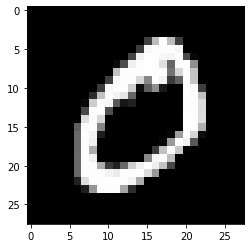

In [9]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

plt.imshow(train_images[1], cmap="Greys_r")
print(train_labels[1])
print(train_images.max())

data = MNISTDataset(train_images.reshape([-1, 784]), train_labels, 
                    test_images.reshape([-1, 784]), test_labels,
                    batch_size=128)
print(data.next_batch()[0].shape)
print(data.next_batch()[1].shape)



In [10]:
train_steps = 1000
learning_rate = 0.1
n_hidden_1 = 256
n_hidden_2 = 256
n_input = 784
n_classes = 10



h1 = tf.Variable(np.random.uniform( low =-0.1, high = 0.1, size=[n_input, n_hidden_1]).astype(np.float32))
h2 = tf.Variable(np.random.uniform(low =-0.1, high = 0.1, size=[n_hidden_1, n_hidden_2]).astype(np.float32))
h_out = tf.Variable(np.random.uniform(low =-0.1, high = 0.1, size =[n_hidden_2, n_classes]).astype(np.float32))


b1 = tf.Variable(tf.random.normal([n_hidden_1]))
b2 = tf.Variable(tf.random.normal([n_hidden_2]))
b_out = tf.Variable(tf.random.normal([n_classes]))


weights = [h1, h2, h_out]
biases = [b1, b2, b_out]



In [19]:
losses = []
accs = []
for step in range(train_steps):
    img_batch, lbl_batch = data.next_batch()
    with tf.GradientTape() as tape:
        layer_1 = tf.add(tf.matmul(img_batch, weights[0]), biases[0])
        layer_2 = tf.add(tf.matmul(layer_1, weights[1]), biases[1])
        logits = tf.matmul(layer_2,weights[2] ) + biases[2]
        xent = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(
            logits=logits, labels=lbl_batch))
    var_list = [h1,h2,h_out,b1,b2,b_out]
    grads = tape.gradient(xent, var_list)
    h1 = h1.assign_sub(learning_rate * grads[0])
    h2 = h2.assign_sub(learning_rate * grads[1])
    h_out = h_out.assign_sub(learning_rate * grads[2])
    b1 = b1.assign_sub(learning_rate * grads[3])
    b2 = b2.assign_sub(learning_rate * grads[4])
    b_out = b_out.assign_sub(learning_rate * grads[5])
    
    if not step % 100:
        preds = tf.argmax(logits, axis=1, output_type=tf.int32)
        acc = tf.reduce_mean(tf.cast(tf.equal(preds, lbl_batch),
                             tf.float32))
        losses.append(xent)
        accs.append(acc)
        print("Loss: {} Accuracy: {}".format(xent, acc))
        test_layer1 = tf.add(tf.matmul(data.test_data, h1), b1)
        test_layer2 = tf.add(tf.matmul(test_layer1, h2), b2)
        test_out = tf.matmul(test_layer2, h_out) + b_out
        test_preds = tf.argmax(test_out, axis=1, output_type=tf.int32)
        test_acc = tf.reduce_mean(tf.cast(tf.equal(test_preds, data.test_labels),
                                     tf.float32))
        print('Accuracy: ', end='')
        print(int(test_acc.numpy()*100), end='')
        print("%")

Loss: 0.21026884019374847 Accuracy: 0.90625
Accuracy: 92%
Loss: 0.20599861443042755 Accuracy: 0.9609375
Accuracy: 92%
Loss: 0.4131777584552765 Accuracy: 0.890625
Accuracy: 92%
Starting new epoch...
Loss: 0.27416178584098816 Accuracy: 0.9296875
Accuracy: 92%
Loss: 0.212630957365036 Accuracy: 0.9296875
Accuracy: 92%
Loss: 0.3723791539669037 Accuracy: 0.90625
Accuracy: 92%
Loss: 0.24592708051204681 Accuracy: 0.9375
Accuracy: 92%
Starting new epoch...
Loss: 0.2546956241130829 Accuracy: 0.921875
Accuracy: 92%
Loss: 0.23238928616046906 Accuracy: 0.921875
Accuracy: 92%
Loss: 0.40789711475372314 Accuracy: 0.9140625
Accuracy: 92%


In [20]:
test_layer1 = tf.add(tf.matmul(data.test_data, h1), b1)
test_layer2 = tf.add(tf.matmul(test_layer1, h2), b2)
test_out = tf.matmul(test_layer2, h_out) + b_out
test_preds = tf.argmax(test_out, axis=1, output_type=tf.int32)
test_acc = tf.reduce_mean(tf.cast(tf.equal(test_preds, data.test_labels),
                             tf.float32))
print('Accuracy: ', end='')
print(int(test_acc.numpy()*100), end='')
print("%")

Accuracy: 92%


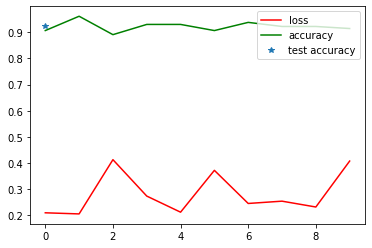

In [21]:
plt.plot(losses, "r", label = 'loss')
plt.plot(accs, "g", label = 'accuracy')
plt.plot(test_acc, "*", label = 'test accuracy')
plt.legend(loc = 'upper right')
plt.show()


# Fashion MNIST

In [22]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datasets import MNISTDataset

255
9


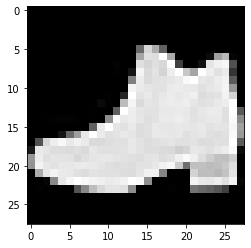

In [36]:
mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = data.load_data()
data = MNISTDataset(train_images.reshape([-1, 784]), train_labels,
                    test_images.reshape([-1, 784]), test_labels,
                    batch_size = 128)
print(train_images.max())
plt.imshow(train_images[15], cmap="Greys_r")
print(train_labels[15])

# Setting Up Parameters: 

In [22]:
train_steps = 20000
learning_rate = 1e-4
n_input = 28*28
n_hidden_1 = 1024
n_hidden_2 = 512
n_hidden_3 = 256
n_hidden_4 = 128
n_classes = 10

# Weights and Biases:

In [23]:
h1 = tf.Variable(np.random.uniform( low =-0.1, high = 0.1, size=[n_input, n_hidden_1]).astype(np.float32))
h2 = tf.Variable(np.random.uniform(low =-0.1, high = 0.1, size=[n_hidden_1, n_hidden_2]).astype(np.float32))
h3 = tf.Variable(np.random.uniform(low =-0.1, high = 0.1, size =[n_hidden_2, n_hidden_3]).astype(np.float32))
h4 = tf.Variable(np.random.uniform(low =-0.1, high = 0.1, size =[n_hidden_3, n_hidden_4]).astype(np.float32))
h_out = tf.Variable(np.random.uniform(low =-0.1, high = 0.1, size =[n_hidden_4, n_classes]).astype(np.float32))


b1 = tf.Variable(tf.random.normal([n_hidden_1]))
b2 = tf.Variable(tf.random.normal([n_hidden_2]))
b3 = tf.Variable(tf.random.normal([n_hidden_3]))
b4 = tf.Variable(tf.random.normal([n_hidden_4]))
b_out = tf.Variable(tf.random.normal([n_classes]))


weights = [h1, h2, h3, h4, h_out]
biases = [b1, b2, b3, b4, b_out]

# Building the Neural Network:

In [24]:
losses = []
accs = []
for step in range(train_steps):
    img_batch, lbl_batch = data.next_batch()
    with tf.GradientTape() as tape:
        layer_1 = tf.add(tf.matmul(img_batch, weights[0]), biases[0])
        layer_2 = tf.add(tf.matmul(layer_1, weights[1]), biases[1])
        layer_3 = tf.add(tf.matmul(layer_2, weights[2]), biases[2])
        layer_4 = tf.add(tf.matmul(layer_3, weights[3]), biases[3])
        logits = tf.matmul(layer_4,weights[4] ) + biases[4]
        xent = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(
            logits=logits, labels=lbl_batch))
    var_list = [h1,h2,h3,h4,h_out,b1,b2,b3,b4,b_out]
    grads = tape.gradient(xent, var_list)
    h1.assign_sub(learning_rate * grads[0])
    h2.assign_sub(learning_rate * grads[1])
    h3.assign_sub(learning_rate * grads[2])
    h4.assign_sub(learning_rate * grads[3])
    h_out.assign_sub(learning_rate * grads[4])
    b1.assign_sub(learning_rate * grads[5])
    b2.assign_sub(learning_rate * grads[6])
    b3.assign_sub(learning_rate * grads[7])
    b4.assign_sub(learning_rate * grads[8])
    b_out.assign_sub(learning_rate * grads[9])
    
    if not step % 100:
        preds = tf.argmax(logits, axis=1, output_type=tf.int32)
        acc = tf.reduce_mean(tf.cast(tf.equal(preds, lbl_batch),
                             tf.float32))
        losses.append(xent)
        accs.append(acc)
        print("Loss: {} Accuracy: {}".format(xent, acc))

Loss: 3.4389069080352783 Accuracy: 0.125
Loss: 2.5017664432525635 Accuracy: 0.078125
Starting new epoch...
Loss: 2.3331797122955322 Accuracy: 0.1171875
Loss: 2.284193754196167 Accuracy: 0.140625
Loss: 2.0204594135284424 Accuracy: 0.2890625
Loss: 2.013874053955078 Accuracy: 0.3046875
Loss: 1.9375674724578857 Accuracy: 0.3515625
Starting new epoch...
Loss: 1.9077236652374268 Accuracy: 0.3359375
Loss: 1.8823491334915161 Accuracy: 0.34375
Loss: 1.7500579357147217 Accuracy: 0.484375
Loss: 1.667014479637146 Accuracy: 0.453125
Starting new epoch...
Loss: 1.6585707664489746 Accuracy: 0.421875
Loss: 1.6001203060150146 Accuracy: 0.546875
Loss: 1.5928500890731812 Accuracy: 0.5390625
Loss: 1.5028314590454102 Accuracy: 0.5703125
Loss: 1.4403910636901855 Accuracy: 0.578125
Starting new epoch...
Loss: 1.4397088289260864 Accuracy: 0.5625
Loss: 1.3451690673828125 Accuracy: 0.6015625
Loss: 1.2413398027420044 Accuracy: 0.671875
Loss: 1.3296682834625244 Accuracy: 0.6171875
Loss: 1.3077501058578491 Accurac

Loss: 0.49213236570358276 Accuracy: 0.859375
Loss: 0.4551517963409424 Accuracy: 0.8671875
Starting new epoch...
Loss: 0.4276880919933319 Accuracy: 0.8671875
Loss: 0.520900547504425 Accuracy: 0.828125
Loss: 0.4713747501373291 Accuracy: 0.890625
Loss: 0.4573105573654175 Accuracy: 0.8671875
Loss: 0.4113032817840576 Accuracy: 0.8671875
Starting new epoch...
Loss: 0.35696306824684143 Accuracy: 0.90625
Loss: 0.3782797157764435 Accuracy: 0.8984375
Loss: 0.4070325195789337 Accuracy: 0.890625
Loss: 0.4992952048778534 Accuracy: 0.8828125
Starting new epoch...
Loss: 0.40881994366645813 Accuracy: 0.875
Loss: 0.3831292390823364 Accuracy: 0.90625
Loss: 0.44885918498039246 Accuracy: 0.8515625
Loss: 0.35818713903427124 Accuracy: 0.890625
Loss: 0.4218575954437256 Accuracy: 0.8828125
Starting new epoch...
Loss: 0.49110549688339233 Accuracy: 0.859375
Loss: 0.6781426668167114 Accuracy: 0.7734375
Loss: 0.4537472128868103 Accuracy: 0.8828125
Loss: 0.4701896905899048 Accuracy: 0.8359375
Loss: 0.5179437398910

# Testing:

In [26]:
test_layer1 = tf.add(tf.matmul(data.test_data, weights[0]), biases[0])
test_layer2 = tf.add(tf.matmul(test_layer1, weights[1]), biases[1])
test_layer3 = tf.add(tf.matmul(test_layer2, weights[2]), biases[2])
test_layer4 = tf.add(tf.matmul(test_layer3, weights[3]), biases[3])
test_out = tf.matmul(test_layer4, weights[4]) + biases[4]
test_preds = tf.argmax(test_out, axis=1, output_type=tf.int32)
test_acc = tf.reduce_mean(tf.cast(tf.equal(test_preds, data.test_labels),
                             tf.float32))
print('Accuracy: ', end='')
print(int(test_acc.numpy()*100), end='')
print("%")

Accuracy: 88%


# Visualizing Loss and Accuracy: 

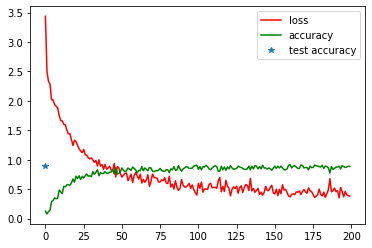

In [27]:
plt.plot(losses, "r", label = 'loss')
plt.plot(accs, "g", label = 'accuracy')
plt.plot(test_acc, "*", label = 'test accuracy')
plt.legend(loc = 'upper right')
plt.show()